### Getting dataset from internet

In [3]:
# import needed libraries
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data.sampler import SubsetRandomSampler
import matplotlib.pyplot as plt
import numpy as np

In [4]:
#training dataset
training_data = datasets.FashionMNIST(root="data",
                                     train=True,
                                     download=True,
                                     transform=ToTensor()
                                     )

100%|█████████████████████████████████████████████████████████████████| 26421880/26421880 [00:15<00:00, 1756120.24it/s]


Extracting data\FashionMNIST\raw\train-images-idx3-ubyte.gz to data\FashionMNIST\raw



100%|████████████████████████████████████████████████████████████████████████| 29515/29515 [00:00<00:00, 178070.12it/s]


Extracting data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to data\FashionMNIST\raw



100%|████████████████████████████████████████████████████████████████████| 4422102/4422102 [00:11<00:00, 382010.79it/s]


Extracting data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to data\FashionMNIST\raw



100%|██████████████████████████████████████████████████████████████████████████████████████| 5148/5148 [00:00<?, ?it/s]

Extracting data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to data\FashionMNIST\raw



In [5]:
#testing dataset
test_data = datasets.FashionMNIST(root="data",
                                 train=False,
                                 download=True,
                                 transform=ToTensor()
                                 )

In [8]:
#validate sample from training data
indices = list(range(len(training_data)))
np.random.shuffle(indices)
split = int(np.floor(0.2 * len(training_data)))
train_sample = SubsetRandomSampler(indices[:split])
validate_sample = SubsetRandomSampler(indices[split:])

In [12]:
#data loader
trainloader = torch.utils.data.DataLoader(training_data, sampler=train_sample, batch_size=64)
validloader = torch.utils.data.DataLoader(training_data, sampler=validate_sample, batch_size=64)
testloader = torch.utils.data.DataLoader(test_data, batch_size=64, shuffle=True)

In [14]:
#data iterator
%matplotlib inline
dataiter = iter(trainloader)
print(dataiter)
images, labels = next(dataiter)

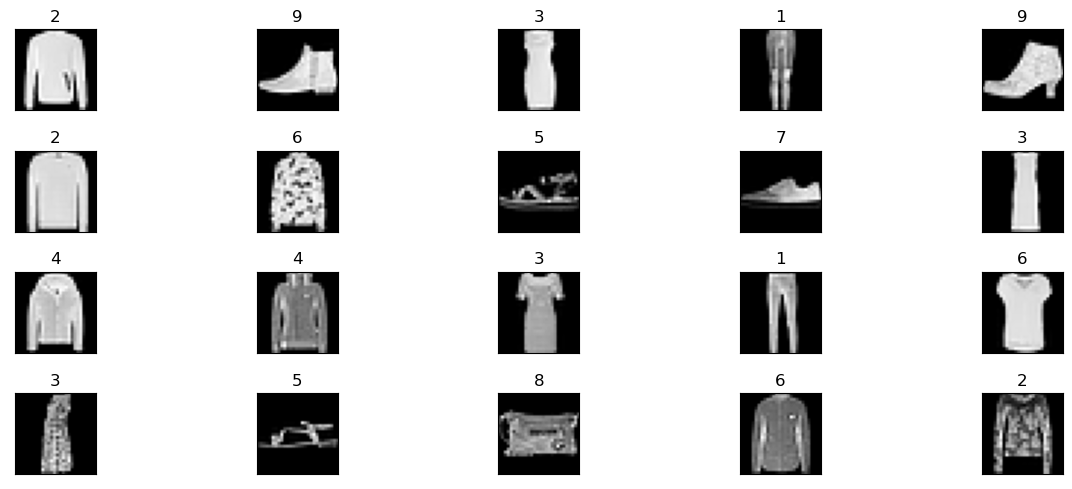

In [17]:
#plot the data
fig = plt.figure(figsize=(15,5))
for i in np.arange(20):
    ax = fig.add_subplot(4, int(20/4), i+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[i]), cmap='gray')
    ax.set_title(labels[i].item())
    fig.tight_layout()

### Loading own dataset

In [18]:
#import libraries
import csv
import torch
import pandas as pd

In [30]:
#set data path
Data_path = "data/root_cause_analysis.csv"
data = pd.read_csv(Data_path, nrows=20)
display(data)

,ID,CPU_LOAD,MEMORY_LEAK_LOAD,DELAY,ERROR_1000,ERROR_1001,ERROR_1002,ERROR_1003,ROOT_CAUSE
0,1,0,0,0,0,1,0,1,MEMORY_LEAK
1,2,0,0,0,0,0,0,1,MEMORY_LEAK
2,3,0,1,1,0,0,1,1,MEMORY_LEAK
3,4,0,1,0,1,1,0,1,MEMORY_LEAK
4,5,1,1,0,1,0,1,0,NETWORK_DELAY
5,6,0,0,1,1,0,0,0,NETWORK_DELAY
6,7,1,0,0,1,1,0,0,NETWORK_DELAY
7,8,0,0,0,1,1,0,1,DATABASE_ISSUE
8,9,0,1,0,0,1,0,1,MEMORY_LEAK
9,10,0,0,0,1,1,0,1,NETWORK_DELAY


In [31]:
import torch.utils.data as data_utils
CPU_data = pd.DataFrame(data['CPU_LOAD'])

In [33]:
#creating tensor from species_data
train_tensor = torch.tensor(CPU_data['CPU_LOAD'].values)

print(train_tensor)

tensor([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0])
